In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [16]:
# Load dataset
df = pd.read_csv("/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Chronic_Kidney_Dsease_data.csv")
col_drop = ['PatientID','DoctorInCharge']
df = df.drop(columns=col_drop)
gf = pd.read_csv('/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/diabetes.csv')

gf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
X = df.drop(columns=["Diagnosis"])  # Features
y = df["Diagnosis"]  # Target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear')
}

In [20]:
# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"---- {name} ----")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---- Logistic Regression ----
Accuracy: 0.9307
              precision    recall  f1-score   support

           0       0.57      0.17      0.26        24
           1       0.94      0.99      0.96       308

    accuracy                           0.93       332
   macro avg       0.75      0.58      0.61       332
weighted avg       0.91      0.93      0.91       332

---- Random Forest ----
Accuracy: 0.9307
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.97      0.52      0.52       332
weighted avg       0.94      0.93      0.90       332



/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:55:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


---- XGBoost ----
Accuracy: 0.9398
              precision    recall  f1-score   support

           0       0.75      0.25      0.38        24
           1       0.94      0.99      0.97       308

    accuracy                           0.94       332
   macro avg       0.85      0.62      0.67       332
weighted avg       0.93      0.94      0.93       332

---- SVM ----
Accuracy: 0.9277
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.86      0.93      0.89       332



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load dataset
df = pd.read_csv("/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Chronic_Kidney_Dsease_data.csv")

In [3]:
# Display basic info
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [4]:
col_drop = ['PatientID','DoctorInCharge']
df = df.drop(columns=col_drop)

In [ ]:
# Splitting features and target
X = df.drop(columns=['Diagnosis'])  # Adjust target column name as needed
y = df['Diagnosis']

In [ ]:
# Handling class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [9]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])
}


In [11]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    }
    print(f"\n---- {name} ----")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


---- Logistic Regression ----
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       297
           1       0.90      0.90      0.90       313

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610


---- Random Forest ----
Accuracy: 0.9721311475409836
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       297
           1       0.98      0.97      0.97       313

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610


---- SVM ----
Accuracy: 0.8950819672131147
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       297
           1       0.9

/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



---- XGBoost ----
Accuracy: 0.9590163934426229
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       297
           1       0.97      0.95      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610



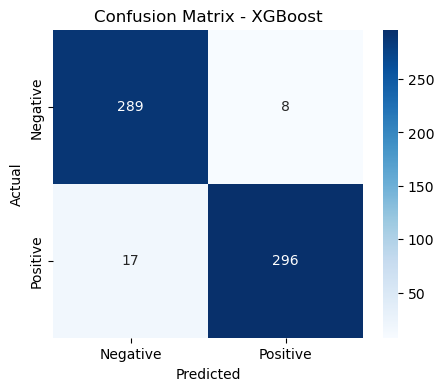

In [13]:
 # Confusion matrix visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


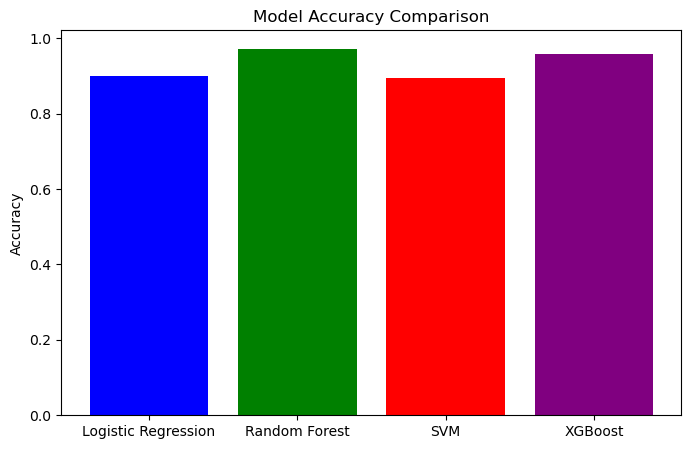

In [14]:
# Compare model accuracy
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [results[m]["Accuracy"] for m in results], color=['blue', 'green', 'red', 'purple'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [17]:
# Splitting features and target
X = gf.drop(columns=['Outcome'])  # Adjust target column name as needed
y = gf['Outcome']

In [18]:
# Handling class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])
}


In [22]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    }
    print(f"\n---- {name} ----")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


---- Logistic Regression ----
Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.75      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200


---- Random Forest ----
Accuracy: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        99
           1       0.77      0.87      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200


---- SVM ----
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73        99
           1       0.74      0.75      0.75    

/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



---- XGBoost ----
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        99
           1       0.76      0.90      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

